In [1]:
import random
import math
import numpy as np
import scipy
from matplotlib import pyplot as plt
from math import pi


def normalize(vec):
  return vec / np.linalg.norm(vec)


def random_point_on_a_sphere(n):
  return normalize(np.random.normal(0, 1, n))


def gs(vecs):
  proj = lambda of, on: np.dot(of, on) / np.dot(on, on) * on
  e = []

  for vec in vecs:
    e.append(normalize(vec - np.sum([proj(vec, ej) for ej in e], axis=0)))
  
  return e


def build_onb(vec, eps=1e-6):
  n = len(vec)
  E = [np.array([int(i == j) for j in range(n)]) for i in range(n)]
  E.pop(next(i for i, x in enumerate(vec) if not abs(x) < eps))
  return gs([vec, *E])


def random_elipsoid(n, S, sigma_dist, p):
  sigma = np.diag(sigma_dist(n) ** 2)

  e = np.column_stack(build_onb(random_point_on_a_sphere(n)))
  c = math.sqrt(2 * scipy.special.gammaincinv(n / 2, p))
  l = c * sigma ** 0.5

  X = np.random.multivariate_normal(np.zeros(n), e @ sigma @ e.transpose(), S)

  # print("p = {} (expected {})".format(
  #   sum([1 for x in X if np.sum(np.array(np.linalg.inv(e @ l) @ np.matrix([x]).transpose())[:, 0] ** 2) <= 1]) / len(X),
  #   p
  # ))

  return X, e, l, np.zeros(n)

/var/folders/h8/kb57sw8j05n3806kkhtfghdm0000gn/T/ipykernel_50416/1786476273.py:32: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(xm, ym, zm, cmap='PuBu_r', shading='auto')


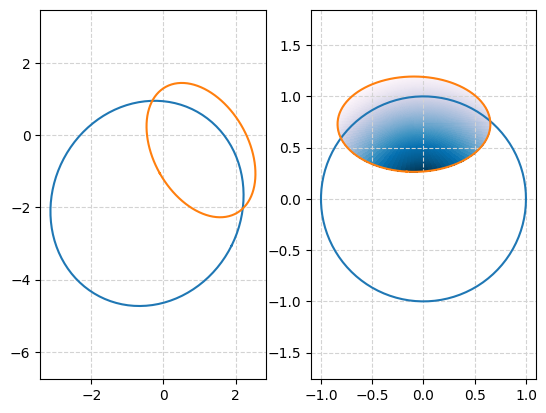

In [2]:
def draw_ellipses(ellipses):
  e1, l1, c1 = ellipses[0]

  for i, ellipse in enumerate(ellipses):
    e, l, c = ellipse

    points_cnt = 100
    t = np.linspace(0, 2 * pi, points_cnt)

    x1 = np.column_stack([c] * points_cnt) + e @ l @ np.array([np.cos(t), np.sin(t)])
    x2 = np.linalg.inv(l1) @ e1.transpose() @ (x1 - np.column_stack([c1] * points_cnt))

    if i > 0:
      s = np.linalg.inv(l1) @ e1.transpose() @ e @ l @ l @ e.transpose() @ e1 @ np.linalg.inv(l1)
      d, v = np.linalg.eig(s)
      d = np.sqrt(np.real_if_close(d))
      x2 = v.transpose() @ x2
      
      c2 = v.transpose() @ np.linalg.inv(l1) @ e1.transpose() @ (c - c1)
      plt.scatter(*c2, s=1, color='r')

      # coloring:
      r, theta = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 2 * pi, 100))
      xm, ym = ([[0 for _ in range(len(r[i]))] for i in range(len(r))] for _ in range(2))
      for i in range(len(r)):
        for j in range(len(r[i])):
          xy = c2 + np.diag(d) @ (r[i][j] * np.array([math.cos(theta[i][j]), math.sin(theta[i][j])]))
          xm[i][j] = xy[0]
          ym[i][j] = xy[1]
      xm, ym = np.array(xm), np.array(ym)
      zm = (xm ** 2 + ym ** 2) ** 0.5
      plt.pcolor(xm, ym, zm, cmap='PuBu_r', shading='auto')

    plt.subplot(1, 2, 1)
    plt.plot(*x1)

    plt.subplot(1, 2, 2)
    plt.plot(*x2)

  for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.axis('equal')
    plt.grid(color='lightgray', linestyle='--')

  plt.show()

ellipses = [(
  *random_elipsoid(2, 0, lambda n : np.random.uniform(0.5, 1.5, n), p=0.85)[1:3],
  random.uniform(1, 5) * random_point_on_a_sphere(2)
) for _ in range(2)]

draw_ellipses(ellipses)
